# Assignment 4: ImageCLEF Medical Caption Task 2019

## Name: Thomas Saltos

## Setup

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display

%matplotlib inline

## Data Exploration

* read `train_concepts`, `val_concepts` and `string_concepts`.
* list some files from training dataset with their tags ids and names.
* most frequent ids.
* images with the most tags.

In [2]:
train_concepts = pd.read_csv('train_concepts.csv')
train_concepts

,image,tags
0,ROCO_CLEF_07350,C0203126;C0203051
1,ROCO_CLEF_19073,C0772294;C0023884;C0221198;C0412555;C0041618
2,ROCO_CLEF_60501,C0233492;C2985494;C0262950;C1306232
3,ROCO_CLEF_05564,C0521530;C0817096
4,ROCO_CLEF_55020,C0935598;C1184743
...,...,...
56624,ROCO_CLEF_40405,C0040395;C0034579;C0015450;C0040405
56625,ROCO_CLEF_17150,C0286840;C3244287
56626,ROCO_CLEF_04341,C0699900;C1553386;C0728863;C0182400;C0042779;C...
56627,ROCO_CLEF_36569,C0023890;C0441633;C3263723


In [3]:
val_concepts = pd.read_csv('val_concepts.csv')
val_concepts

,image,tags
0,ROCO_CLEF_64017,C0001074;C3203359;C0041618
1,ROCO_CLEF_39073,C0027530;C1610719;C0065967;C1704258;C0883242;C...
2,ROCO_CLEF_18028,C1265876;C1293134;C0029053;C0034579;C0025066;C...
3,ROCO_CLEF_02052,C0040426;C1962945;C0043299;C0036849;C0150312
4,ROCO_CLEF_67927,C0184666;C4085643;C4049705;C4049706;C4321335;C...
...,...,...
14152,ROCO_CLEF_08685,C0043299;C1548003;C1962945
14153,ROCO_CLEF_63867,C1963113;C0040395;C0921176;C0034579;C0525187;C...
14154,ROCO_CLEF_42562,C0456605;C0023884;C0441633
14155,ROCO_CLEF_18130,C0009368;C0227391


In [4]:
full_concepts = pd.concat([train_concepts, val_concepts])
full_concepts

,image,tags
0,ROCO_CLEF_07350,C0203126;C0203051
1,ROCO_CLEF_19073,C0772294;C0023884;C0221198;C0412555;C0041618
2,ROCO_CLEF_60501,C0233492;C2985494;C0262950;C1306232
3,ROCO_CLEF_05564,C0521530;C0817096
4,ROCO_CLEF_55020,C0935598;C1184743
...,...,...
14152,ROCO_CLEF_08685,C0043299;C1548003;C1962945
14153,ROCO_CLEF_63867,C1963113;C0040395;C0921176;C0034579;C0525187;C...
14154,ROCO_CLEF_42562,C0456605;C0023884;C0441633
14155,ROCO_CLEF_18130,C0009368;C0227391


In [5]:
string_concepts = pd.read_csv('string_concepts.csv',sep='\t', header=None, names=['tag', 'name'])
string_concepts

,tag,name
0,C0032143,r-tpa
1,C0225516,lower hypopharyngeal region
2,C0825429,bone surface
3,C0020461,excessive potassium in the blood
4,C0947912,proximal muscle weakness due to defect at the ...
...,...,...
5523,C0044955,prednylidene (pred)
5524,C3812869,medicated
5525,C2751430,camptodactyly and knuckle pads
5526,C0441621,sampled


In [6]:
# adapted from https://stackoverflow.com/a/9728478
def list_files(start_path, num_files):
    for root, dirs, files in os.walk(start_path):
        level = root.replace(start_path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(indent + os.path.basename(root) + '/', end='')
        if len(files) != 0:
            print()
        sub_indent = ' ' * 4 * (level + 1)
        print(sub_indent, end='')
        for i, f in enumerate(files):
            print(f, end=' ')
            if i == num_files - 1:
                break
        print()

In [7]:
path = 'training-set'
list_files(path, 5)

training-set/
    ROCO_CLEF_00000.jpg ROCO_CLEF_00001.jpg ROCO_CLEF_00003.jpg ROCO_CLEF_00004.jpg ROCO_CLEF_00005.jpg 


In [8]:
len(os.listdir(path))

56629

In [9]:
def append_ext(fn):
    return fn+".jpg"

In [10]:
train_concepts["image"]=train_concepts["image"].apply(append_ext)
train_concepts.head()

,image,tags
0,ROCO_CLEF_07350.jpg,C0203126;C0203051
1,ROCO_CLEF_19073.jpg,C0772294;C0023884;C0221198;C0412555;C0041618
2,ROCO_CLEF_60501.jpg,C0233492;C2985494;C0262950;C1306232
3,ROCO_CLEF_05564.jpg,C0521530;C0817096
4,ROCO_CLEF_55020.jpg,C0935598;C1184743


In [11]:
PATH = "./training-set/ROCO_CLEF_{0:05d}.jpg"

def display_images(rows, cols):

    plt.figure(figsize=(10,10))
    for i in range(rows * cols):
        try:
            p = PATH.format(i)
            image = mpimg.imread(p) # images are color images
            plt.subplot(rows, cols, i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(image, cmap=plt.cm.binary)
            filename = p.split("/")[2]
            tags = train_concepts.loc[train_concepts["image"] == filename]['tags'].values[0].split(";")
            names = []
            for tag in tags:
                name = string_concepts.loc[string_concepts['tag'] == tag]['name'].values[0]
                names.append(name)
            
            plt.xlabel(p.split("/")[2]+"\n"+ str(tags)+ "\n"+str(names))
        except FileNotFoundError:
            pass

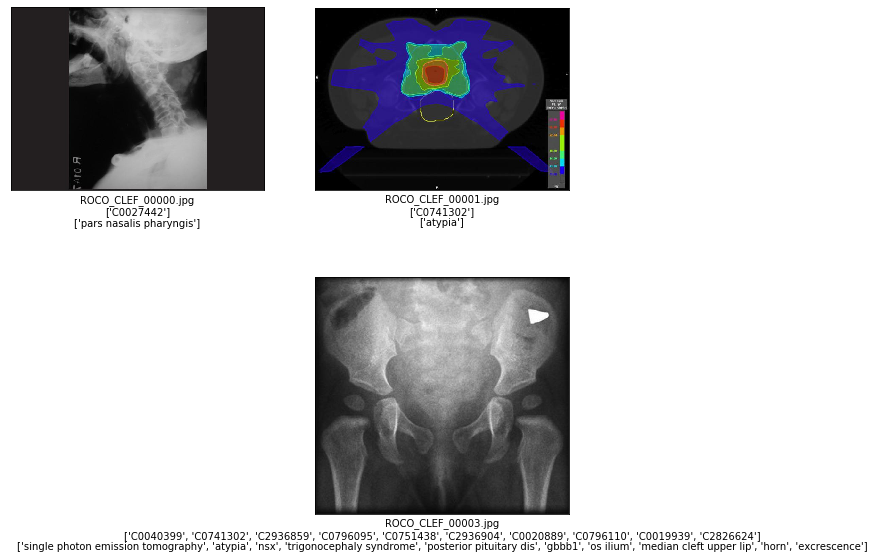

In [12]:
display_images(2, 2)

In [13]:
def fetch_tagIds(rows, cols):
    for i in range(rows * cols):
        try:
            p = PATH.format(i)
            filename = p.split("/")[2]
            tags = train_concepts.loc[train_concepts["image"] == filename]['tags'].values[0].split(";")
            names = []
            for tag in tags:
                name = string_concepts.loc[string_concepts['tag'] == tag]['name'].values[0]
                names.append(name)
            print("image: {},\ntags: {},\nnames: {}\n".format(filename, tags, names))
        except Exception:
            pass

In [14]:
fetch_tagIds(4,4)

image: ROCO_CLEF_00000.jpg,
tags: ['C0027442'],
names: ['pars nasalis pharyngis']

image: ROCO_CLEF_00001.jpg,
tags: ['C0741302'],
names: ['atypia']

image: ROCO_CLEF_00003.jpg,
tags: ['C0040399', 'C0741302', 'C2936859', 'C0796095', 'C0751438', 'C2936904', 'C0020889', 'C0796110', 'C0019939', 'C2826624'],
names: ['single photon emission tomography', 'atypia', 'nsx', 'trigonocephaly syndrome', 'posterior pituitary dis', 'gbbb1', 'os ilium', 'median cleft upper lip', 'horn', 'excrescence']

image: ROCO_CLEF_00004.jpg,
tags: ['C0687028', 'C0005388', 'C1261287', 'C1550227'],
names: ['a tube shaped organ structure', 'portion of bile', 'stenosi', 'duct']

image: ROCO_CLEF_00005.jpg,
tags: ['C0772294', 'C0231881', 'C0221198', 'C0441633'],
names: ['alesion', 'resonance', 'visible lesion', 'diagnostic scanning']

image: ROCO_CLEF_00007.jpg,
tags: ['C0817096', 'C0796494', 'C0332448', 'C1546677'],
names: ['thoracics', 'lobus', 'tissue infiltration', 'infiltrate']

image: ROCO_CLEF_00008.jpg,
tags:

In [15]:
len(string_concepts)

5528

In [16]:
from collections import Counter
Counter(" ".join(full_concepts["tags"]).split(";")).most_common(10)

[('C0034579', 7226),
 ('C1548003', 5991),
 ('C0441633', 5825),
 ('C0817096', 5481),
 ('C0043299', 5341),
 ('C1962945', 4876),
 ('C0772294', 4213),
 ('C0040395', 4062),
 ('C0040405', 3646),
 ('C0221198', 3323)]

In [17]:
full_concepts['count'] = (full_concepts.apply(lambda x: len(x['tags'].split(";")), axis=1))
full_concepts.sort_values(by='count', ascending=False).head(10)

,image,tags,count
12205,ROCO_CLEF_24282,C1561540;C0032743;C0251244;C0040395;C0011311;C...,77
10974,ROCO_CLEF_46788,C1548005;C3244286;C3244287;C1561543;C1561542;C...,74
40499,ROCO_CLEF_69357,C0544724;C0183191;C0729274;C0565342;C0182362;C...,72
42812,ROCO_CLEF_46672,C0544724;C0183191;C0729274;C0565342;C0182362;C...,70
40486,ROCO_CLEF_44813,C0922671;C0227991;C0506734;C0582818;C0149575;C...,69
10623,ROCO_CLEF_03622,C0150312;C0027121;C2242558;C0038774;C0005558;C...,64
3601,ROCO_CLEF_15228,C0746922;C0497156;C3854058;C1514241;C0025519;C...,56
41235,ROCO_CLEF_35223,C0013218;C0497156;C2939420;C1706817;C0013216;C...,45
47507,ROCO_CLEF_40118,C0201989;C0085140;C0015252;C0007876;C1305857;C...,43
3991,ROCO_CLEF_68842,C0504085;C0001558;C2939420;C0772294;C0227665;C...,40


In [18]:
full_concepts['count'].sum()

432753

In [19]:
full_concepts['count'].mean()

6.113539400446416

* 432753 tags in total
* 6 tags per image

## Data Preprocessing

* convert tags in list format.
* load datasets using `flow_from_dataframe` method.

In [20]:
train_concepts["tags"]=train_concepts["tags"].apply(lambda x:x.split(";"))
train_concepts.head()

,image,tags
0,ROCO_CLEF_07350.jpg,"[C0203126, C0203051]"
1,ROCO_CLEF_19073.jpg,"[C0772294, C0023884, C0221198, C0412555, C0041..."
2,ROCO_CLEF_60501.jpg,"[C0233492, C2985494, C0262950, C1306232]"
3,ROCO_CLEF_05564.jpg,"[C0521530, C0817096]"
4,ROCO_CLEF_55020.jpg,"[C0935598, C1184743]"


In [21]:
val_concepts["image"]=val_concepts["image"].apply(append_ext)
val_concepts["tags"]=val_concepts["tags"].apply(lambda x:x.split(";"))
val_concepts.head()

,image,tags
0,ROCO_CLEF_64017.jpg,"[C0001074, C3203359, C0041618]"
1,ROCO_CLEF_39073.jpg,"[C0027530, C1610719, C0065967, C1704258, C0883..."
2,ROCO_CLEF_18028.jpg,"[C1265876, C1293134, C0029053, C0034579, C0025..."
3,ROCO_CLEF_02052.jpg,"[C0040426, C1962945, C0043299, C0036849, C0150..."
4,ROCO_CLEF_67927.jpg,"[C0184666, C4085643, C4049705, C4049706, C4321..."


In [22]:
batch_size = 32
epochs = 12
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [23]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [24]:
train_generator = train_image_generator.flow_from_dataframe(dataframe=train_concepts,
                                                            directory="./training-set/", 
                                                            x_col="image",
                                                            y_col='tags',
                                                            class_mode="categorical",
                                                            shuffle=True,
                                                            classes=string_concepts['tag'].tolist(),
                                                            target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                            batch_size=batch_size)

Found 56629 validated image filenames belonging to 5528 classes.


In [25]:
valid_generator=validation_image_generator.flow_from_dataframe(dataframe=val_concepts,
                                                               directory="./validation-set/",
                                                               x_col="image",
                                                               y_col="tags",
                                                               batch_size=batch_size,
                                                               seed=42,
                                                               class_mode="categorical",
                                                               shuffle=True,
                                                               classes=string_concepts['tag'].tolist(),
                                                               target_size=(IMG_HEIGHT,IMG_WIDTH))

Found 14157 validated image filenames belonging to 5528 classes.


## Build a Baseline

* dummy classifier with most frequent tags.

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
tags_labels = mlb.fit_transform(train_concepts['tags'])

In [26]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_generator, tags_labels)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [27]:
dummy_clf.predict(train_generator)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [28]:
dummy_clf.score(train_generator, tags_labels)

0.5384180790960452

## Build a Neural Network

* an input layer with 32 filters.
* 3 hiden layers.
* a dense layer with 5528 outputs with the probability of each tag.

In [26]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(5528, activation='sigmoid')
])

In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        4

In [64]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator.filenames) // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=len(valid_generator.filenames) // batch_size,
)

Epoch 1/12
1769/1769 [==============================] - 1841s 1s/step - loss: 38.5422 - accuracy: 0.0112 - val_loss: 37.2705 - val_accuracy: 0.0349
Epoch 2/12
1769/1769 [==============================] - 1810s 1s/step - loss: 35.8902 - accuracy: 0.0491 - val_loss: 36.5551 - val_accuracy: 0.0598
Epoch 3/12
1769/1769 [==============================] - 1809s 1s/step - loss: 33.9403 - accuracy: 0.0701 - val_loss: 36.5355 - val_accuracy: 0.0764
Epoch 4/12
1769/1769 [==============================] - 1808s 1s/step - loss: 32.0015 - accuracy: 0.0800 - val_loss: 37.0569 - val_accuracy: 0.0643
Epoch 5/12
1769/1769 [==============================] - 1794s 1s/step - loss: 30.3231 - accuracy: 0.0932 - val_loss: 37.6028 - val_accuracy: 0.0682
Epoch 6/12
1769/1769 [==============================] - 1785s 1s/step - loss: 29.0850 - accuracy: 0.1071 - val_loss: 38.8337 - val_accuracy: 0.0645
Epoch 7/12
1769/1769 [==============================] - 1783s 1s/step - loss: 28.2455 - accuracy: 0.1136 - val_l

In [65]:
model.save("simple_model_1.h5")

In [66]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,38.543665,0.011202,37.270528,0.034856,0
1,35.890306,0.049084,36.555079,0.059813,1
2,33.940165,0.070074,36.535458,0.076357,2
3,32.002617,0.079987,37.056868,0.064338,3
4,30.321879,0.093167,37.602825,0.068227,4
5,29.083807,0.107126,38.833689,0.064480,5
6,28.246357,0.113575,39.255163,0.061227,6
7,27.609075,0.123575,39.665147,0.057904,7
8,27.144688,0.125766,40.257906,0.061581,8
9,26.773958,0.132339,40.557140,0.059460,9


Text(0.5, 1.0, 'Training and Validation Loss')

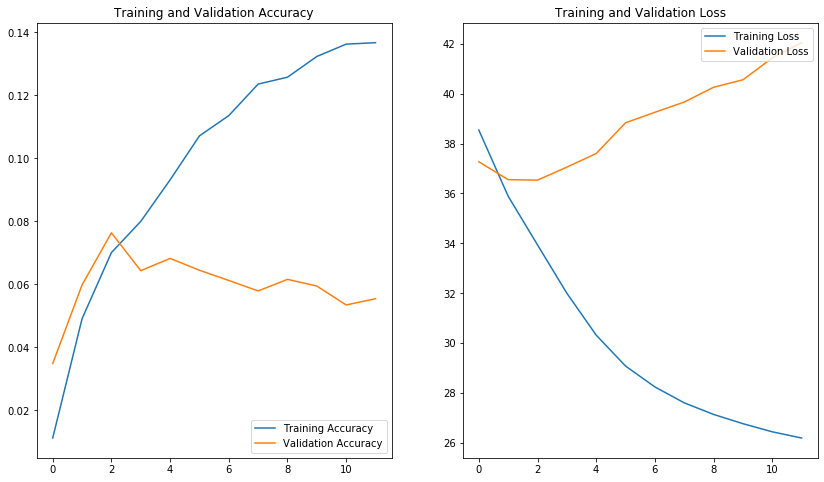

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

## Assessment

* predictions for the validation and the test set.
* `0.0005` was the threshold for the tag selection.
* `evaluate_f1` script was used to evaluate the model.

In [26]:
batch_size = 99
valid_generator=validation_image_generator.flow_from_dataframe(dataframe=val_concepts,
                                                               directory="./validation-set/",
                                                               x_col="image",
                                                               y_col="tags",
                                                               batch_size=batch_size,
                                                               seed=42,
                                                               class_mode="categorical",
                                                               shuffle=False,
                                                               classes=string_concepts['tag'].tolist(),
                                                               target_size=(IMG_HEIGHT,IMG_WIDTH))

Found 14157 validated image filenames belonging to 5528 classes.


In [27]:
valid_generator.reset()
pred=model.predict_generator(valid_generator, steps=len(valid_generator.filenames) // batch_size, verbose=1)

143/143 [==============================] - 157s 1s/step


In [28]:
pred_bool = (pred > 0.0005)

In [29]:
predictions=[]
labels = valid_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
for row in pred_bool:
    l=[]
    for index,cls in enumerate(row):
        if cls:
            l.append(labels[index])
    predictions.append(";".join(l))
filenames=valid_generator.filenames
results=pd.DataFrame({"image":filenames,
                      "predictions":predictions})
results.to_csv("results-val.csv", sep='\t', index=False, header=False)
results

,image,predictions
0,ROCO_CLEF_64017.jpg,C0000726;C0001074;C0002978;C0003617;C0003842;C...
1,ROCO_CLEF_39073.jpg,C0027530;C0037949;C0221198;C0221874;C0231881;C...
2,ROCO_CLEF_18028.jpg,C0013687;C0016059;C0018827;C0024109;C0029053;C...
3,ROCO_CLEF_02052.jpg,C0043299;C1548003;C1962945
4,ROCO_CLEF_67927.jpg,C0000726;C0021853;C0024109;C0029053;C0030797;C...
...,...,...
14152,ROCO_CLEF_08685.jpg,C0004454;C0021156;C0024947;C0026367;C0043299;C...
14153,ROCO_CLEF_63867.jpg,
14154,ROCO_CLEF_42562.jpg,C0009924;C0034579;C0040395;C0040405;C0221198;C...
14155,ROCO_CLEF_18130.jpg,C0030797;C0034579;C0040395;C0040405;C0441633;C...


In [30]:
import glob
csvs = glob.glob(os.path.join('test-set/*.jpg'))

testdf = pd.DataFrame({'filename': csvs})
testdf['filename']=testdf['filename'].apply(lambda x:x.split("\\")[1])
testdf

,filename
0,ROCO_CLEF_TEST_00001.jpg
1,ROCO_CLEF_TEST_00002.jpg
2,ROCO_CLEF_TEST_00003.jpg
3,ROCO_CLEF_TEST_00004.jpg
4,ROCO_CLEF_TEST_00005.jpg
...,...
9995,ROCO_CLEF_TEST_09996.jpg
9996,ROCO_CLEF_TEST_09997.jpg
9997,ROCO_CLEF_TEST_09998.jpg
9998,ROCO_CLEF_TEST_09999.jpg


In [31]:
test_image_generator = ImageDataGenerator(rescale=1./255)
batch_size=100
test_generator = test_image_generator.flow_from_dataframe(dataframe=testdf,
                                                          directory="./test-set/",
                                                          x_col="filename",
                                                          batch_size=batch_size,
                                                          class_mode=None,
                                                          shuffle=False,
                                                          target_size=(IMG_HEIGHT,IMG_WIDTH))

Found 10000 validated image filenames.


In [32]:
test_generator.reset()
pred_test=model.predict_generator(test_generator, steps=len(test_generator.filenames) // batch_size, verbose=1)

100/100 [==============================] - 139s 1s/step


In [33]:
pred_bool_test = (pred_test > 0.0005)

In [34]:
predictions=[]
labels = valid_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
for row in pred_bool_test:
    l=[]
    for index,cls in enumerate(row):
        if cls:
            l.append(labels[index])
    predictions.append(";".join(l))
filenames=test_generator.filenames
results=pd.DataFrame({"image":filenames,
                      "predictions":predictions})
results.to_csv("results-test.csv", sep='\t', index=False, header=False)
results

,image,predictions
0,ROCO_CLEF_TEST_00001.jpg,C0018670;C0037303;C0040399;C0043299;C0751438;C...
1,ROCO_CLEF_TEST_00002.jpg,C0034579;C0040395;C0040405;C0441633
2,ROCO_CLEF_TEST_00003.jpg,C0002978;C0003842;C0012737;C0027530;C0043299;C...
3,ROCO_CLEF_TEST_00004.jpg,C0043299;C1962945
4,ROCO_CLEF_TEST_00005.jpg,
...,...,...
9995,ROCO_CLEF_TEST_09996.jpg,C0009924;C0013687;C0034579;C0040395;C0040405;C...
9996,ROCO_CLEF_TEST_09997.jpg,C0003842;C0005682;C0006104;C0007765;C0009924;C...
9997,ROCO_CLEF_TEST_09998.jpg,C0006104;C0079595;C0221198;C0228174;C0231881;C...
9998,ROCO_CLEF_TEST_09999.jpg,C0004454;C0021156;C0024947;C0035139;C0040426;C...


In [35]:
val_concepts["tags"]=val_concepts["tags"].apply(lambda x:";".join(x))
val_concepts.to_csv("gt-val.csv", sep='\t', index=False, header=False)

In [36]:
%run evaluate-f1 results-val.csv gt-val.csv

Input parameters
********************************
Candidate file is "results-val.csv"
Ground Truth file is "gt-val.csv"
Processing concept sets...
********************************
1000 / 14157  concept sets processed...
2000 / 14157  concept sets processed...
3000 / 14157  concept sets processed...
4000 / 14157  concept sets processed...
5000 / 14157  concept sets processed...
6000 / 14157  concept sets processed...
7000 / 14157  concept sets processed...
8000 / 14157  concept sets processed...
9000 / 14157  concept sets processed...
10000 / 14157  concept sets processed...
11000 / 14157  concept sets processed...
12000 / 14157  concept sets processed...
13000 / 14157  concept sets processed...
14000 / 14157  concept sets processed...
Concept statistics
********************************
Number of concepts distribution
1 : 1037
2 : 1387
3 : 1615
4 : 1683
5 : 1626
6 : 1371
7 : 1242
8 : 943
9 : 794
10 : 632
11 : 456
12 : 340
13 : 275
14 : 208
15 : 136
16 : 136
17 : 64
18 : 50
19 : 36
20 : 

<Figure size 432x288 with 0 Axes>